In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_raw = df[df.YrSold < 2010].reset_index(drop=True)
test_raw = df[df.YrSold >= 2010].reset_index(drop=True)

In [6]:
train_raw.shape

(1285, 81)

In [7]:
test_raw.shape

(175, 81)

In [8]:
train_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
pd.set_option('display.max_columns', 500)
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
cols_num = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold','SalePrice']

<font color='red'>Assignment:</font> Get a Dataframe **train** which contains all the numerical columns cols_num.

In [11]:
train=train_raw[cols_num]
test=test_raw[cols_num]

In [12]:
train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,150,856,856,854,0,1710,8,2003.0,2,548,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,284,1262,1262,0,0,1262,6,1976.0,2,460,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,434,920,920,866,0,1786,6,2001.0,2,608,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,540,756,961,756,0,1717,7,1998.0,3,642,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,490,1145,1145,1053,0,2198,9,2000.0,3,836,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,35.0,3675,5,5,2005,2005,80.0,0,547,1072,0,0,1072,5,2005.0,2,525,2006,145000
1281,90.0,17217,5,5,2006,2006,0.0,1140,1140,1140,0,0,1140,6,NaN,0,0,2006,84500
1282,62.0,7500,7,5,2004,2005,0.0,811,1221,1221,0,0,1221,6,2004.0,2,400,2009,185000
1283,62.0,7917,6,5,1999,2000,0.0,953,953,953,694,0,1647,7,1999.0,2,460,2007,175000


<font color='red'>Assignment:</font> Calculate Pearson correlations between all the columns in **train**. Using **DataFrame.corr()**.

In [13]:
corr=train.corr(method='pearson')

In [14]:
corr

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
LotFrontage,1.000000,0.429174,0.258696,-0.073652,0.119894,0.092629,0.206542,0.143000,0.409464,0.468780,0.093888,0.048427,0.422878,0.364516,0.074331,0.286521,0.350272,-0.009150,0.362953
LotArea,0.429174,1.000000,0.103058,-0.006611,0.013597,0.022432,0.097894,-0.003153,0.265013,0.295886,0.046535,0.007424,0.255977,0.180204,-0.024573,0.149407,0.175091,-0.009819,0.256522
OverallQual,0.258696,0.103058,1.000000,-0.079991,0.555661,0.552281,0.413555,0.316381,0.540819,0.477027,0.300197,-0.029472,0.595012,0.429619,0.536582,0.594965,0.556097,-0.015006,0.791936
OverallCond,-0.073652,-0.006611,-0.079991,1.000000,-0.375079,0.056508,-0.127148,-0.132833,-0.176644,-0.153348,0.041363,0.021128,-0.076096,-0.060877,-0.330946,-0.188598,-0.155267,0.043232,-0.071976
YearBuilt,0.119894,0.013597,0.555661,-0.375079,1.000000,0.593441,0.315916,0.150105,0.389549,0.282329,0.000785,-0.190863,0.189200,0.092578,0.831888,0.539419,0.481415,-0.015438,0.516608
YearRemodAdd,0.092629,0.022432,0.552281,0.056508,0.593441,1.000000,0.183199,0.197206,0.292472,0.239929,0.150996,-0.072637,0.293739,0.198309,0.641180,0.425519,0.373653,0.046310,0.510059
MasVnrArea,0.206542,0.097894,0.413555,-0.127148,0.315916,0.183199,1.000000,0.112040,0.357940,0.340881,0.182252,-0.071460,0.392418,0.277699,0.257274,0.362922,0.376138,0.008349,0.472279
BsmtUnfSF,0.143000,-0.003153,0.316381,-0.132833,0.150105,0.197206,0.112040,1.000000,0.418025,0.320247,-0.000289,0.036778,0.237896,0.250771,0.192492,0.218757,0.191327,-0.032886,0.219387
TotalBsmtSF,0.409464,0.265013,0.540819,-0.176644,0.389549,0.292472,0.357940,0.418025,1.000000,0.822177,-0.166036,-0.034440,0.461656,0.292729,0.327104,0.433385,0.492738,-0.015425,0.604576
1stFlrSF,0.468780,0.295886,0.477027,-0.153348,0.282329,0.239929,0.340881,0.320247,0.822177,1.000000,-0.198143,-0.011848,0.567529,0.409844,0.237891,0.445796,0.499158,-0.017962,0.600848


<font color='red'>Question:</font> How is Pearson correlation calcualted? What does it mean?

Pearson correlation tells us how strong two variables are related. Its value ranges from -1 to +1 with 0 indicating no correlation, negative values indicating negative correlation and positive ones indicating positive correlation.
The Pearson's correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample.

<font color='red'>Assignment:</font> Plot the correlations in heatmap using **seaborn**.

<AxesSubplot:>

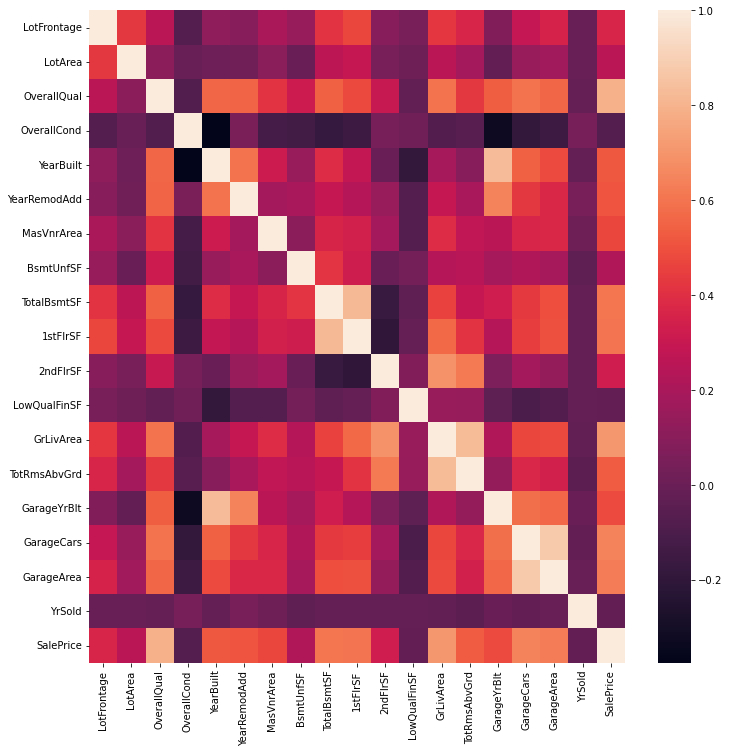

In [15]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

<font color='red'>Assignment:</font> Visulize the relationships between these columns using **pairplot** in **seaborn**.

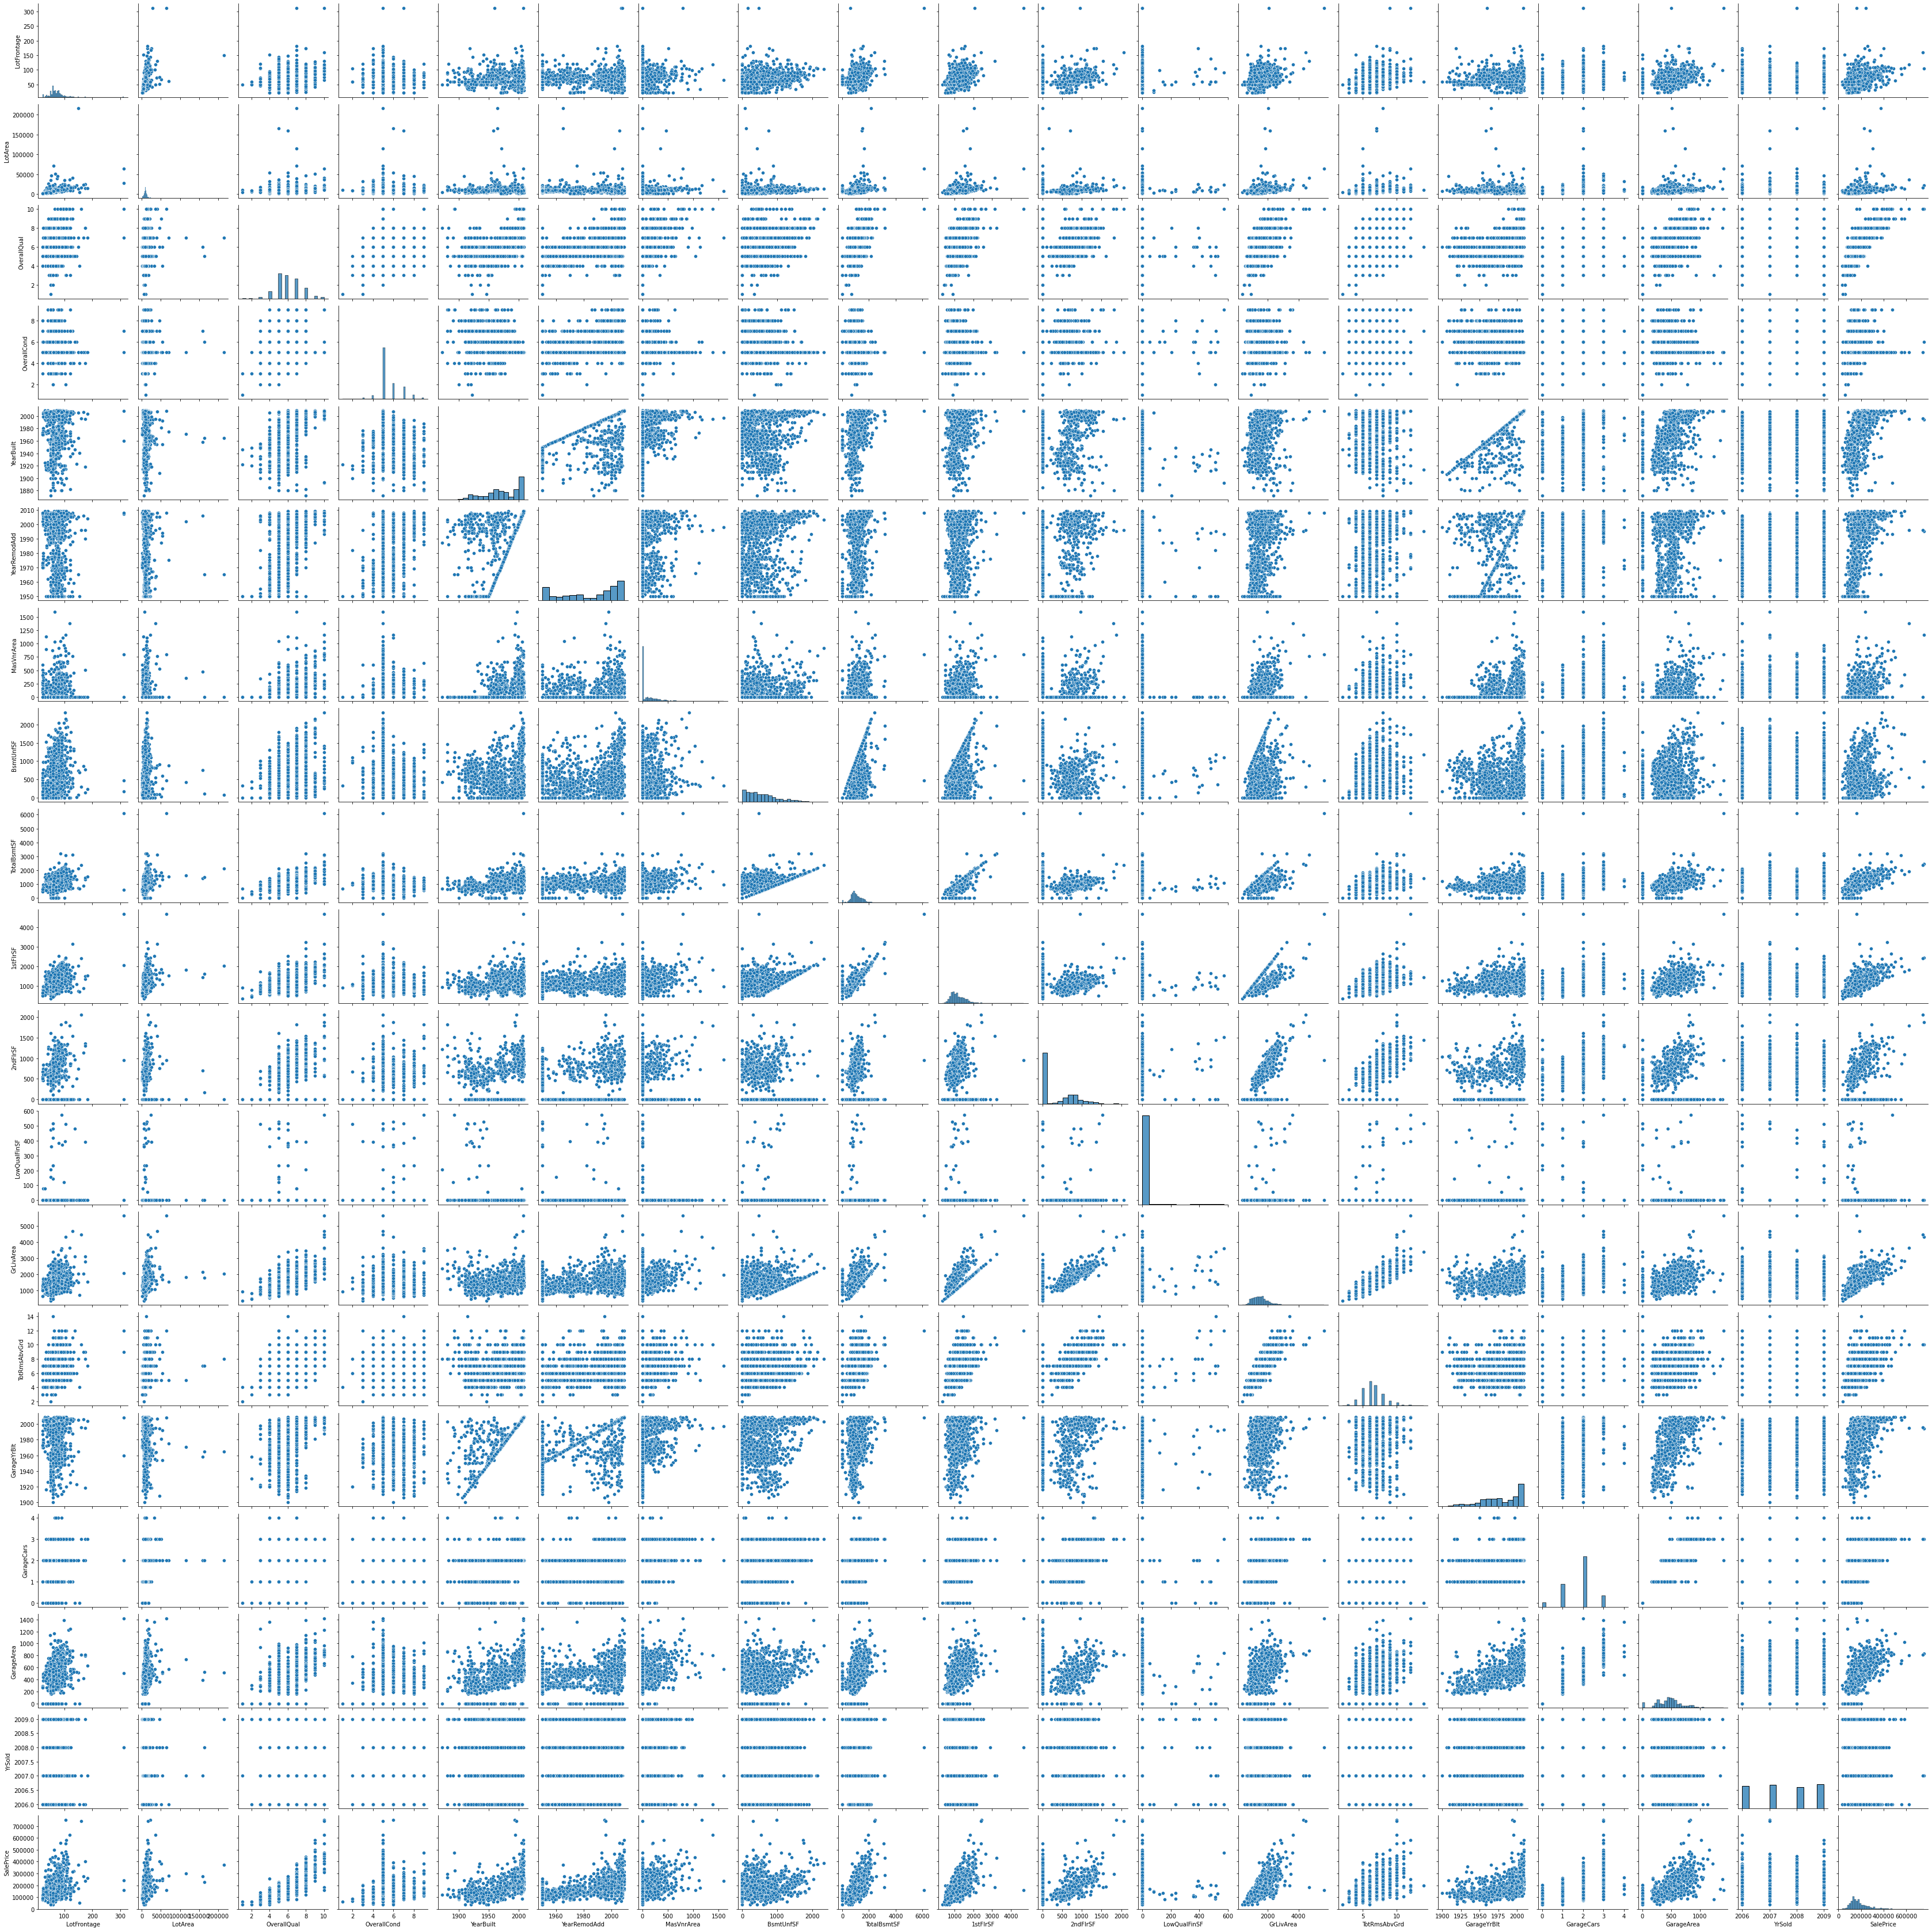

In [19]:
sns.pairplot(train)

<font color='red'>Question:</font> Which features are highly correlated?

In [26]:
corr[corr<1].stack().nlargest(20)[::2]

GarageCars    GarageArea      0.880204
YearBuilt     GarageYrBlt     0.831888
GrLivArea     TotRmsAbvGrd    0.823173
TotalBsmtSF   1stFlrSF        0.822177
OverallQual   SalePrice       0.791936
GrLivArea     SalePrice       0.707788
2ndFlrSF      GrLivArea       0.689125
GarageCars    SalePrice       0.641778
YearRemodAdd  GarageYrBlt     0.641180
GarageArea    SalePrice       0.625583
dtype: float64

In [16]:
corr[corr>-1].stack().nsmallest(20)[::2]

OverallCond  YearBuilt      -0.375079
             GarageYrBlt    -0.330946
1stFlrSF     2ndFlrSF       -0.198143
YearBuilt    LowQualFinSF   -0.190863
OverallCond  GarageCars     -0.188598
             TotalBsmtSF    -0.176644
TotalBsmtSF  2ndFlrSF       -0.166036
OverallCond  GarageArea     -0.155267
             1stFlrSF       -0.153348
             BsmtUnfSF      -0.132833
dtype: float64

(GarageCars, GarageArea)      0.880204
(YearBuilt, GarageYrBlt)     0.831888
(GrLivArea, TotRmsAbvGrd)    0.823173
(TotalBsmtSF, 1stFlrSF)        0.822177
These are highly correlated

<font color='red'>Assignment:</font> Wrap up MinMaxScaler and linear regression as a pipeline and use the numerical columns cols_num (except sale price column) to predict **sale price**. 

In [17]:
train.isna().sum()

LotFrontage     227
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        7
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
TotRmsAbvGrd      0
GarageYrBlt      70
GarageCars        0
GarageArea        0
YrSold            0
SalePrice         0
dtype: int64

In [18]:
test.isna().sum()

LotFrontage     32
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       1
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
TotRmsAbvGrd     0
GarageYrBlt     11
GarageCars       0
GarageArea       0
YrSold           0
SalePrice        0
dtype: int64

In [19]:
#Since LotFrontage can be zero, here we will replace null values with zero
train.LotFrontage.fillna(0, inplace=True)
test.LotFrontage.fillna(0, inplace=True)

In [20]:
#We have 7 null values in MasVnrArea so replacing that with zero as some values are zero in MasVnrArea
train.MasVnrArea.fillna(0, inplace = True)
test.MasVnrArea.fillna(0, inplace = True)

In [21]:
#we have 70 null values in GarageYrBlt. It is the year garage build so we cannot take mean for imputing the null values nor can we take 0. 
#Replacing them using FFill 

train.GarageYrBlt.ffill(inplace = True)
test.GarageYrBlt.ffill(inplace = True)

In [62]:
test.LotFrontage.fillna(0, inplace = True)
test.MasVnrArea.fillna(0, inplace = True)
test.GarageYrBlt.ffill(inplace = True)

In [22]:
train.isna().sum()
test.isna().sum()

LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
TotRmsAbvGrd    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

In [23]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

X_test = test[features].copy()
y_test = test[target].copy()

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

steps = [('rescale', MinMaxScaler()),
             ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)


<font color='red'>Assignment:</font> Obtain the training and testing scores. 

In [25]:
#train loss

y_train_pred = model.predict(X_train)

#Answer
#Computing Mean Absolute Error, MEan Square Error, R^2
print('Mean Absolute Error : ',mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error : ',mean_squared_error(y_train,y_train_pred))
print('R^2: ', r2_score(y_train,y_train_pred))


Mean Absolute Error :  22072.090610067306
Mean Squared Error :  1318918831.589271
R^2:  0.7902264202914796


In [26]:
#test loss

#Predicting for Test Dataset
y_test_pred = model.predict(X_test)

#test lost calculation
print('Mean Squared Error / Test Loss: ',mean_squared_error(y_test,y_test_pred))

print('Mean Absolute Error : ',mean_absolute_error(y_train,y_train_pred))
#test data R^2 prediction
print('R2:',r2_score(y_test,y_test_pred))


Mean Squared Error / Test Loss:  1178882961.8879685
Mean Absolute Error :  22072.090610067306
R2: 0.816813454015431


<font color='red'>Assignment:</font> Plot the feature importance. Hint: coefficients in linear regression; use plt.bar, plt.xticks(rotation=45, ha='right')

In [70]:
lr = model.steps[1][1]
coeff = list(lr.coef_)

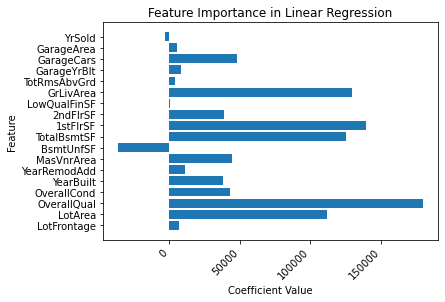

In [71]:
plt.barh(cols_num[:-1],coeff)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

<font color='red'>Question:</font> How do you explain these feature importance?

OverallQual has highest absolute value coefficient meaning its most important. Variables like GrLivArea, 1stFlrSF  and TotalBsmtSF follow suit. The variables having absolute value close to 0 have least effect on target value and thus are less important

<font color='red'>Assignment:</font> Notice that **YieldBuilt** and **GarageYrBlt** are highly correlated. Remove **YearBuilt**, repeat the above steps.

In [27]:
train.drop(columns = ['YearBuilt'], inplace = True)

In [28]:
features = list(train.columns)
target = "SalePrice"
features.remove(target)

X_train = train[features].copy()
y_train = train[target].copy()

X_test = test[features].copy()
y_test = test[target].copy()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

steps = [('rescale', MinMaxScaler()),
             ('lr', LinearRegression())]
model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [30]:
#train data
y_train_pred = model.predict(X_train)
print('Mean Absolute Error : ',mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error : ',mean_squared_error(y_train,y_train_pred))
print('R^2: ', r2_score(y_train,y_train_pred))

Mean Absolute Error :  22363.229186829576
Mean Squared Error :  1337846598.9209325
R^2:  0.7872159655053665


In [31]:
#test data
y_test_pred = model.predict(X_test)
print('Mean Squared Error / Test Loss: ',mean_squared_error(y_test,y_test_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_train,y_train_pred))
print('R2:',r2_score(y_test,y_test_pred))

Mean Squared Error / Test Loss:  1181151509.2721972
Mean Absolute Error :  22363.229186829576
R2: 0.8164609445864597


In [32]:
lr = model.steps[1][1]
coeff = list(lr.coef_)

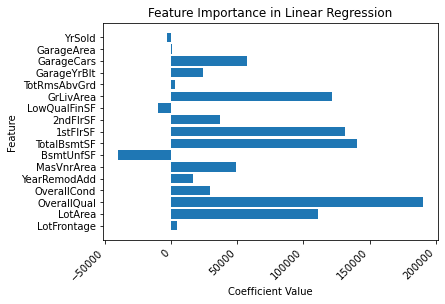

In [36]:
plt.barh(features,coeff)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

<font color='red'>Question:</font> What are the differences in training/testing scores and feature importance before and after removing YearBuilt?

There isnt much difference between test loss before and after removing YearBuilt whereas train loss increases after removing YearBuilt. As for Fetaures graph, OverallQual still remains the highest value but value of BsmtUnfSF further decreases

<font color='red'>Question:</font> What is collinearity? How do you handle it?

Collinearity arises when 2 or more variables are highly correlated. This leads to redundancy since those variables are essentially presenting same information so it becomes difficult for model to uncover true relationships.
We should check correlations between variables and remove the variables which are highly correlated or use regularisations to handle it.